In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=77b5f013dde17970fb37d6415a3c845f


In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [15]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [16]:
cities

['puerto ayora',
 'nelson bay',
 'saskylakh',
 'tsihombe',
 'san quintin',
 'mama',
 'atuona',
 'nikolskoye',
 'bluff',
 'yellowknife',
 'hermanus',
 'rikitea',
 'lagoa',
 'vardo',
 'saint george',
 'albany',
 'yulara',
 'nanaimo',
 'busselton',
 'khatanga',
 'cabo san lucas',
 'mys shmidta',
 'port hedland',
 'ponta do sol',
 'bethel',
 'samusu',
 'the valley',
 'hasaki',
 'new norfolk',
 'pushkar',
 'novyy urgal',
 'hobart',
 'illoqqortoormiut',
 'cozumel',
 'ushuaia',
 'saint-philippe',
 'lamont',
 'provideniya',
 'sitka',
 'hami',
 'byron bay',
 'parit buntar',
 'viligili',
 'karaul',
 'torbay',
 'aleppo',
 'port alfred',
 'punta arenas',
 'port shepstone',
 'qaanaaq',
 'utiroa',
 'sao filipe',
 'quatre cocos',
 'mahebourg',
 'olafsvik',
 'dingle',
 'ahipara',
 'hilo',
 'boissevain',
 'sola',
 'floro',
 'los llanos de aridane',
 'kampong chhnang',
 'bengkulu',
 'hervey bay',
 'east london',
 'balabac',
 'vaini',
 'sorland',
 'castro',
 'robertsport',
 'mindelo',
 'barentsburg',
 'd

In [17]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | puerto ayora
Processing Record 2 of Set 13 | nelson bay
Processing Record 3 of Set 13 | saskylakh
Processing Record 4 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 13 | san quintin
Processing Record 6 of Set 13 | mama
Processing Record 7 of Set 13 | atuona
Processing Record 8 of Set 13 | nikolskoye
Processing Record 9 of Set 13 | bluff
Processing Record 10 of Set 13 | yellowknife
Processing Record 11 of Set 13 | hermanus
Processing Record 12 of Set 13 | rikitea
Processing Record 13 of Set 13 | lagoa
Processing Record 14 of Set 13 | vardo
Processing Record 15 of Set 13 | saint george
Processing Record 16 of Set 13 | albany
Processing Record 17 of Set 13 | yulara
Processing Record 18 of Set 13 | nanaimo
Processing Record 19 of Set 13 | busselton
Processing Record 20 of Set 13 | khatanga
Processing Record 21 of Set 13 | cabo san lucas
Processing Record 22 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 23 

Processing Record 32 of Set 16 | gulabpura
Processing Record 33 of Set 16 | angoram
Processing Record 34 of Set 16 | monywa
Processing Record 35 of Set 16 | verkhnevilyuysk
Processing Record 36 of Set 16 | uinskoye
Processing Record 37 of Set 16 | amderma
City not found. Skipping...
Processing Record 38 of Set 16 | klaksvik
Processing Record 39 of Set 16 | muzhi
Processing Record 40 of Set 16 | semirom
Processing Record 41 of Set 16 | thompson
Processing Record 42 of Set 16 | rawannawi
City not found. Skipping...
Processing Record 43 of Set 16 | rio cuarto
Processing Record 44 of Set 16 | meulaboh
Processing Record 45 of Set 16 | kudahuvadhoo
Processing Record 46 of Set 16 | port lincoln
Processing Record 47 of Set 16 | roebourne
Processing Record 48 of Set 16 | bargal
City not found. Skipping...
Processing Record 49 of Set 16 | faanui
Processing Record 50 of Set 16 | svetlaya
Processing Record 1 of Set 17 | mogok
Processing Record 2 of Set 17 | coihaique
Processing Record 3 of Set 17 

Processing Record 17 of Set 20 | kamenskoye
City not found. Skipping...
Processing Record 18 of Set 20 | dunedin
Processing Record 19 of Set 20 | kjollefjord
Processing Record 20 of Set 20 | bend
Processing Record 21 of Set 20 | codrington
Processing Record 22 of Set 20 | alacranes
Processing Record 23 of Set 20 | dormidontovka
Processing Record 24 of Set 20 | west wendover
Processing Record 25 of Set 20 | santa cruz
Processing Record 26 of Set 20 | sinnamary
Processing Record 27 of Set 20 | kwinana
Processing Record 28 of Set 20 | babanusah
City not found. Skipping...
Processing Record 29 of Set 20 | umzimvubu
City not found. Skipping...
Processing Record 30 of Set 20 | leningradskiy
Processing Record 31 of Set 20 | galgani
City not found. Skipping...
Processing Record 32 of Set 20 | pangnirtung
Processing Record 33 of Set 20 | salalah
Processing Record 34 of Set 20 | okha
Processing Record 35 of Set 20 | kencong
Processing Record 36 of Set 20 | moerai
Processing Record 37 of Set 20 |

Processing Record 4 of Set 24 | karamay
City not found. Skipping...
Processing Record 5 of Set 24 | eureka
Processing Record 6 of Set 24 | tautira
Processing Record 7 of Set 24 | grindavik
Processing Record 8 of Set 24 | suntar
Processing Record 9 of Set 24 | gorom-gorom
Processing Record 10 of Set 24 | biak
Processing Record 11 of Set 24 | lopsmarka
Processing Record 12 of Set 24 | saint-joseph
Processing Record 13 of Set 24 | ardabil
Processing Record 14 of Set 24 | guane
Processing Record 15 of Set 24 | jawhar
Processing Record 16 of Set 24 | tigil
Processing Record 17 of Set 24 | marataizes
Processing Record 18 of Set 24 | sisimiut
Processing Record 19 of Set 24 | biskamzha
Processing Record 20 of Set 24 | sakaraha
Processing Record 21 of Set 24 | adre
Processing Record 22 of Set 24 | falealupo
City not found. Skipping...
Processing Record 23 of Set 24 | san carlos de bariloche
Processing Record 24 of Set 24 | shieli
Processing Record 25 of Set 24 | sampit
Processing Record 26 of S

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,69.55,92,64,7.00,EC,2021-11-30 02:22:00
1,Nelson Bay,-32.7167,152.1500,74.95,84,100,1.99,AU,2021-11-30 02:22:00
2,Saskylakh,71.9167,114.0833,-28.35,100,88,4.14,RU,2021-11-30 02:22:00
3,San Quintin,30.4833,-115.9500,61.66,81,0,6.89,MX,2021-11-30 02:22:01
4,Mama,58.3106,112.8986,4.42,98,100,3.91,RU,2021-11-30 02:22:01
5,Atuona,-9.8000,-139.0333,78.91,76,4,21.43,PF,2021-11-30 02:17:04
6,Nikolskoye,59.7035,30.7861,26.40,95,100,8.25,RU,2021-11-30 02:22:02
7,Bluff,-46.6000,168.3333,62.80,75,92,6.04,NZ,2021-11-30 02:19:26
8,Yellowknife,62.4560,-114.3525,-18.58,83,20,5.75,CA,2021-11-30 02:21:54
9,Hermanus,-34.4187,19.2345,60.91,85,76,9.71,ZA,2021-11-30 02:22:02


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


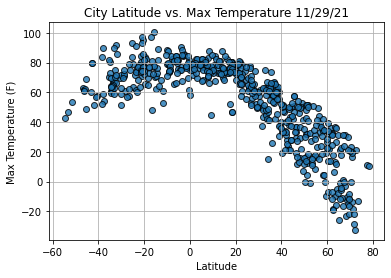

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

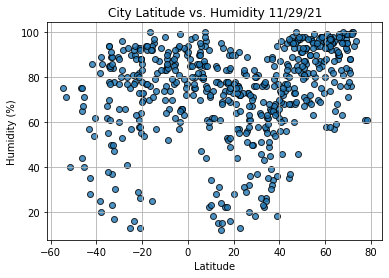

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

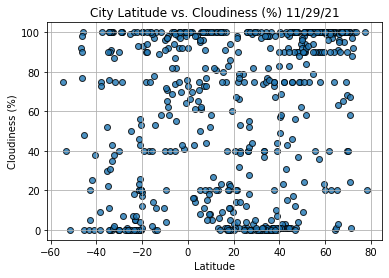

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

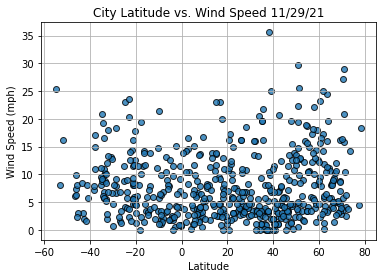

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [40]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
# Create a new DataFrame from a current DataFrame by using loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                 Saint George
Lat                       37.1041
Lng                     -113.5841
Max Temp                    57.79
Humidity                       34
Cloudiness                      1
Wind Speed                    0.0
Country                        US
Date          2021-11-30 02:18:51
Name: 13, dtype: object

In [44]:
city_data_df["Lat"]

0      False
1      False
2       True
3       True
4       True
       ...  
557     True
558     True
559     True
560    False
561    False
Name: Lat, Length: 562, dtype: bool

In [42]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Saskylakh,71.9167,114.0833,-28.35,100,88,4.14,RU,2021-11-30 02:22:00
3,San Quintin,30.4833,-115.9500,61.66,81,0,6.89,MX,2021-11-30 02:22:01
4,Mama,58.3106,112.8986,4.42,98,100,3.91,RU,2021-11-30 02:22:01
6,Nikolskoye,59.7035,30.7861,26.40,95,100,8.25,RU,2021-11-30 02:22:02
8,Yellowknife,62.4560,-114.3525,-18.58,83,20,5.75,CA,2021-11-30 02:21:54


In [63]:
# Create Northern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Saskylakh,71.9167,114.0833,-28.35,100,88,4.14,RU,2021-11-30 02:22:00
3,San Quintin,30.4833,-115.9500,61.66,81,0,6.89,MX,2021-11-30 02:22:01
4,Mama,58.3106,112.8986,4.42,98,100,3.91,RU,2021-11-30 02:22:01
6,Nikolskoye,59.7035,30.7861,26.40,95,100,8.25,RU,2021-11-30 02:22:02
8,Yellowknife,62.4560,-114.3525,-18.58,83,20,5.75,CA,2021-11-30 02:21:54


In [64]:
# Create Southern Hemisphere DataFrames.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,69.55,92,64,7.00,EC,2021-11-30 02:22:00
1,Nelson Bay,-32.7167,152.1500,74.95,84,100,1.99,AU,2021-11-30 02:22:00
5,Atuona,-9.8000,-139.0333,78.91,76,4,21.43,PF,2021-11-30 02:17:04
7,Bluff,-46.6000,168.3333,62.80,75,92,6.04,NZ,2021-11-30 02:19:26
9,Hermanus,-34.4187,19.2345,60.91,85,76,9.71,ZA,2021-11-30 02:22:02


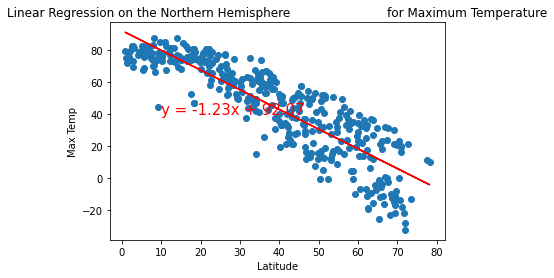

<Figure size 432x288 with 0 Axes>

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

# Save the figure.
plt.savefig("weather_data/Fig5.png")

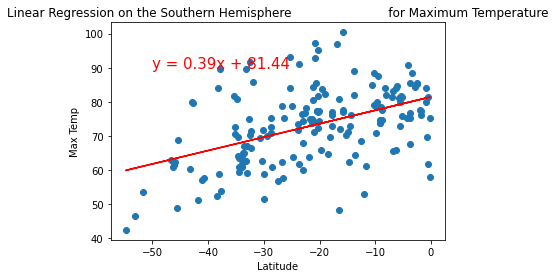

<Figure size 432x288 with 0 Axes>

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# Save the figure.
plt.savefig("weather_data/Fig6.png")

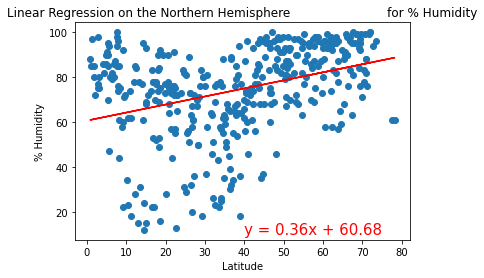

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

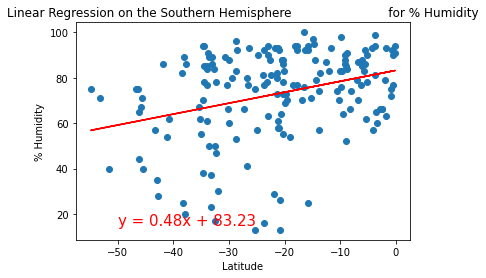

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

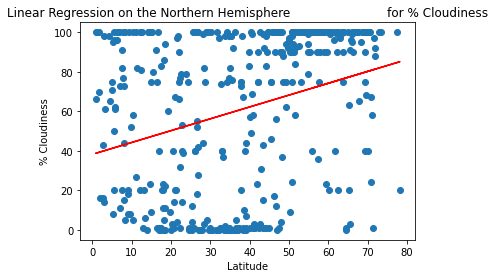

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

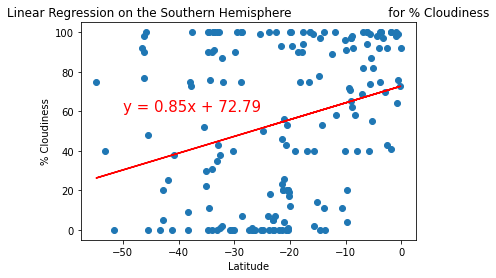

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

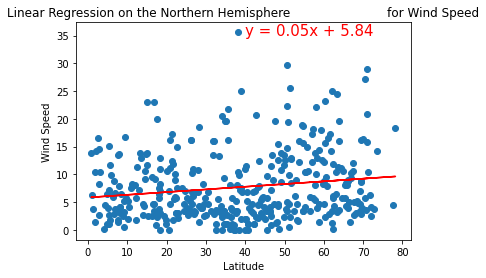

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

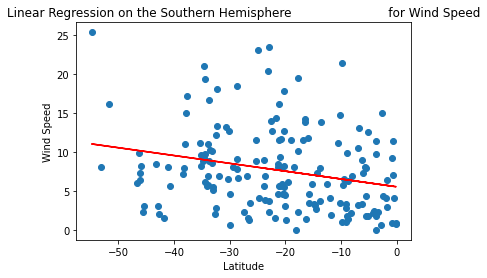

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))